# Prep 15 Minute Weather Data

In [1]:
working_dir = "/Volumes/Samsung_T5/WeatherNet_V2/weather_data"
data_dir = working_dir + "/15_min_data"

In [2]:
import pandas as pd 
import numpy as np 
import os 
import shutil
import glob 

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir(working_dir)
print(os.getcwd())
os.system("dot_clean .")

/Volumes/Samsung_T5/WeatherNet_V2/weather_data


/Users/rick/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0

In [3]:
os.listdir(data_dir + "/original_15min_data")

['feb_2020_15min.csv',
 'jan_2020_15min.csv',
 'mar_2020_15min.csv',
 'may_2020_15min.csv',
 'apr_2020_15min.csv']

In [4]:
col_names = [
'Month',
'Year',
'Central Standard Time at end of period',
'Average 60 m temperature',
'Average 60 m wind speed',
'Vector-averaged 60 m wind speed',
'Vector-averaged 60 m wind direction',
'Standard deviation of 60 m wind direction', 
'Total precipitaion for the period',
'Estimated heat flux',
'Estimated friction velocity',
'Average 10 m temperature',  
'Average 10 m wind speed', 
'Vector-averaged 10 m wind speed', 
'Vector-averaged 10 m wind direction', 
'Standard deviation of 10 m wind direction', 
'Average global irrradiation', 
'Average net radiation',
'Estimated surface roughness length', 
'day_month',
'Average 10 m vapor pressure', 
'Average 10 m dew point temperature', 
]

In [5]:
def parse_weather_data(df):
    n_rows = df.shape[0]
    rows = []
    for i in range(n_rows):
        tag = df.iloc[i,0]
        if "M" in tag:
            sample = df.iloc[i:i+3,:].values
            sample = sample.flatten()
            rows.append(sample)
    df = np.stack(rows, axis=0)  
    df = pd.DataFrame(df)
    
    a, b = df.iloc[:,0].values, df.iloc[:,1].values
    b = b.astype(int)
    a = a.tolist()
    a = list(map(lambda x: x.replace(" ", ""),a))
    a = list(map(lambda x: x.replace("M","0"),a))
    a = np.array(a)
    a = a.astype(int)
    list1 = a.tolist()
    list2 = b.tolist()

    day_month = []
    for i in range(len(list1)):
        day_month.append(str(list1[i]) + str(list2[i]))
    df = df.iloc[:,2:]
    df["day_month"] = pd.Series((v for v in day_month))
    
    df["13_14"] = df[13].astype(str)  +"."+ df[14].astype(str)
    p_vals = [val.split(".")[:-1] for i,val in enumerate(df["13_14"].values)]
    p_vals = [".".join(val) for i,val in enumerate(p_vals)]
    df["13_14"] = pd.Series((v for v in p_vals)) 
    
    df["16_17"] = df[16].astype(str)  +"."+ df[17].astype(str)
    p_vals = [val.split(".")[:-1] for i,val in enumerate(df["16_17"].values)]
    p_vals = [".".join(val) for i,val in enumerate(p_vals)]
    df["16_17"] = pd.Series((v for v in p_vals))  
    
    df["26_27_28"] = df[26].astype(str) + "."  + df[27].astype(str)+ df[28].astype(str)
    p_vals = [val.split(".")[0::2] for i,val in enumerate(df["26_27_28"].values)]
    p_vals = [".".join(val) for i,val in enumerate(p_vals)]
    df["26_27_28"] = pd.Series((v for v in p_vals))   
    
    df["29_30"] = df[29].astype(str)  +"."+ df[30].astype(str)
    p_vals = [val.split(".")[0::2] for i,val in enumerate(df["29_30"].values)]
    p_vals = [".".join(val) for i,val in enumerate(p_vals)]
    df["29_30"] = pd.Series((v for v in p_vals))     
    df["29_30"] = df["29_30"].astype(float)
    
    df = df.drop([13,14,15,16,17,26,27,28,29,30,31,32,33,34,35,36,37,38],axis=1)
    df = df.iloc[:,:-2]
    df.columns = col_names
    return df

In [6]:
jan_df = pd.read_csv(data_dir + "/original_15min_data/jan_2020_15min.csv",header=None)
jan_new_df = parse_weather_data(jan_df)

In [7]:
feb_df = pd.read_csv(data_dir + "/original_15min_data/feb_2020_15min.csv",header=None)
feb_new_df = parse_weather_data(feb_df)

In [8]:
mar_df = pd.read_csv(data_dir + "/original_15min_data/mar_2020_15min.csv",header=None)
mar_new_df = parse_weather_data(mar_df)

In [9]:
apr_df = pd.read_csv(data_dir + "/original_15min_data/apr_2020_15min.csv",header=None)
apr_new_df = parse_weather_data(apr_df)

In [10]:
may_df = pd.read_csv(data_dir + "/original_15min_data/may_2020_15min.csv",header=None)
may_new_df = parse_weather_data(may_df)

In [11]:
new_dfs = [jan_new_df,feb_new_df,mar_new_df,apr_new_df,may_new_df]

In [12]:
col_to_float = ['Average 60 m temperature', 
'Average 60 m wind speed',
'Vector-averaged 60 m wind speed',
'Vector-averaged 60 m wind direction',
'Standard deviation of 60 m wind direction',
'Total precipitaion for the period', 
'Estimated heat flux',
'Estimated friction velocity', 
'Average 10 m temperature',
'Average 10 m wind speed', 
'Vector-averaged 10 m wind speed',
'Vector-averaged 10 m wind direction',
'Standard deviation of 10 m wind direction',
'Average global irrradiation',
'Average net radiation',
'Estimated surface roughness length',
'Average 10 m vapor pressure', 
'Average 10 m dew point temperature']

In [13]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

In [14]:
for j, df in enumerate(new_dfs):
    for i,col_name in enumerate(col_to_float):
        if df[col_name].dtype == "O":
            new_dfs[j][col_name] = df[col_name].apply(remove_whitespace)
            new_dfs[j][col_name] = pd.to_numeric(df[col_name],errors='coerce')

In [15]:
switch_month = {"1":"01",
                "2":"02",
                "3":"03",
                "4":"04",
                "5":"05",
}

for j,df in enumerate(new_dfs):
    Months = []
    [Months.append(switch_month.get(str(month))) for i,month in enumerate(df["Month"].values)]
    new_dfs[j]["Month"] = Months

In [16]:

switch_times = {"15.0": "00_15",
               "30.0": "00_30",
               "45.0": "00_45",
               "100.0": "01_00",
               "115.0": "01_15",
               "130.0": "01_30",
               "145.0": "01_45",
               "200.0":"02_00",
               "215.0":"02_15",
               "230.0":"02_30",
               "245.0":"02_45",
               "300.0":"03_00",
               "315.0":"03_15",
               "330.0":"03_30",
               "345.0":"03_45",
               "400.0":"04_00",
               "415.0":"04_15",
               "430.0":"04_30",
               "445.0":"04_45",
               "500.0":"05_00",
               "515.0":"05_15",
               "530.0":"05_30",
               "545.0":"05_45",
               "600.0":"06_00",
               "615.0":"06_15",
               "630.0":"06_30",
               "645.0":"06_45", 
               "700.0":"07_00",
               "715.0":"07_15",
               "730.0":"07_30",
               "745.0":"07_45", 
               "800.0":"08_00",
               "815.0":"08_15",
               "830.0":"08_30",
               "845.0":"08_45",   
               "900.0":"09_00",
               "915.0":"09_15",
               "930.0":"09_30",
               "945.0":"09_45", 
               "1000.0":"10_00",
               "1015.0":"10_15",
               "1030.0":"10_30",
               "1045.0":"10_45",   
               "1100.0":"11_00",
               "1115.0":"11_15",
               "1130.0":"11_30",
               "1145.0":"11_45", 
               "1200.0":"12_00",
               "1215.0":"12_15",
               "1230.0":"12_30",
               "1245.0":"12_45",  
               "1300.0":"13_00",
               "1315.0":"13_15",
               "1330.0":"13_30",
               "1345.0":"13_45",  
               "1400.0":"14_00",
               "1415.0":"14_15",
               "1430.0":"14_30",
               "1445.0":"14_45",    
               "1500.0":"15_00",
               "1515.0":"15_15",
               "1530.0":"15_30",
               "1545.0":"15_45",   
               "1600.0":"16_00",
               "1615.0":"16_15",
               "1630.0":"16_30",
               "1645.0":"16_45",    
               "1700.0":"17_00",
               "1715.0":"17_15",
               "1730.0":"17_30",
               "1745.0":"17_45", 
               "1800.0":"18_00",
               "1815.0":"18_15",
               "1830.0":"18_30",
               "1845.0":"18_45",   
               "1900.0":"19_00",
               "1915.0":"19_15",
               "1930.0":"19_30",
               "1945.0":"19_45",   
               "2000.0":"20_00",
               "2015.0":"20_15",
               "2030.0":"20_30",
               "2045.0":"20_45",   
               "2100.0":"21_00",
               "2115.0":"21_15",
               "2130.0":"21_30",
               "2145.0":"21_45",  
               "2200.0":"22_00",
               "2215.0":"22_15",
               "2230.0":"22_30",
               "2245.0":"22_45", 
               "2300.0":"23_00",
               "2315.0":"23_15",
               "2330.0":"23_30",
               "2345.0":"23_45", 
               "2400.0":"00_00", 
              }


for j,df in enumerate(new_dfs):
    hour_min = []
    [hour_min.append(switch_times.get(str(month))) for i,month in enumerate(df["Central Standard Time at end of period"].values)]
    new_dfs[j]["hour_min"] = hour_min

In [17]:
new_dfs[0].head()

,Month,Year,Central Standard Time at end of period,Average 60 m temperature,Average 60 m wind speed,Vector-averaged 60 m wind speed,Vector-averaged 60 m wind direction,Standard deviation of 60 m wind direction,Total precipitaion for the period,Estimated heat flux,...,Vector-averaged 10 m wind speed,Vector-averaged 10 m wind direction,Standard deviation of 10 m wind direction,Average global irrradiation,Average net radiation,Estimated surface roughness length,day_month,Average 10 m vapor pressure,Average 10 m dew point temperature,hour_min
0,01,20,15,-3.4994,584.35,578.00,263.98,8.4474,0.0,0.0,...,409.71,264.28,11.341,0.0,-52.595,7.61,01,0.418,-5.1122,00_15
1,01,20,30,-3.5981,622.76,616.97,263.45,7.8146,0.0,0.0,...,434.80,261.12,10.872,0.0,-52.977,9.21,01,0.414,-5.2493,00_30
2,01,20,45,-3.7045,642.28,636.82,263.51,7.4678,0.0,0.0,...,432.51,264.08,10.863,0.0,-53.749,17.02,01,0.414,-5.2413,00_45
3,01,20,100,-3.8625,596.84,591.08,262.92,7.9610,0.0,0.0,...,403.36,259.55,11.250,0.0,-54.059,14.98,01,0.411,-5.3480,01_00
4,01,20,115,-3.9970,559.11,554.50,262.78,7.3519,0.0,0.0,...,399.90,264.20,10.980,0.0,-53.716,4.33,01,0.407,-5.4834,01_15


In [18]:
for j,df in enumerate(new_dfs):
    new_dfs[j]["time_stamp"] = df["Year"] + "20_" +df["Month"] +\
                "_" + df["day_month"] + "_" + df["hour_min"]
    new_dfs[j].drop(["Year","Month","day_month",\
                    "Central Standard Time at end of period","hour_min"],inplace=True,axis=1)

In [19]:
all_weather = pd.concat(new_dfs,ignore_index=True)
all_weather.index = all_weather["time_stamp"]

In [20]:
all_weather.tail()

,Average 60 m temperature,Average 60 m wind speed,Vector-averaged 60 m wind speed,Vector-averaged 60 m wind direction,Standard deviation of 60 m wind direction,Total precipitaion for the period,Estimated heat flux,Estimated friction velocity,Average 10 m temperature,Average 10 m wind speed,Vector-averaged 10 m wind speed,Vector-averaged 10 m wind direction,Standard deviation of 10 m wind direction,Average global irrradiation,Average net radiation,Estimated surface roughness length,Average 10 m vapor pressure,Average 10 m dew point temperature,time_stamp
time_stamp,,,,,,,,,,,,,,,,,,,
2020_05_31_23_00,13.829,539.86,538.79,132.49,3.6073,0.0,99999.0,99999.0,12.426,247.87,245.33,112.09,8.1998,0.0,-49.891,99999.0,0.900,5.4140,2020_05_31_23_00
2020_05_31_23_15,13.670,551.59,550.01,131.80,4.3396,0.0,99999.0,99999.0,12.522,247.41,242.98,113.29,10.8450,0.0,-49.556,99999.0,0.879,5.7770,2020_05_31_23_15
2020_05_31_23_30,13.493,526.85,525.78,133.72,3.6461,0.0,99999.0,99999.0,12.456,227.04,222.94,115.66,10.8850,0.0,-49.559,99999.0,0.867,4.8914,2020_05_31_23_30
2020_05_31_23_45,13.372,484.08,482.83,139.14,4.1152,0.0,99999.0,99999.0,12.512,207.51,203.64,119.09,11.0610,0.0,-48.540,99999.0,0.859,4.7494,2020_05_31_23_45
2020_05_31_00_00,13.252,446.98,445.40,140.85,4.8172,0.0,99999.0,99999.0,12.552,202.90,198.43,119.08,12.0170,0.0,-48.133,99999.0,0.851,4.6170,2020_05_31_00_00


In [21]:
all_weather['Average net radiation'].quantile([0.33,0.66,1])

0.33      -11.28788
0.66       36.50212
1.00    99999.00000
Name: Average net radiation, dtype: float64

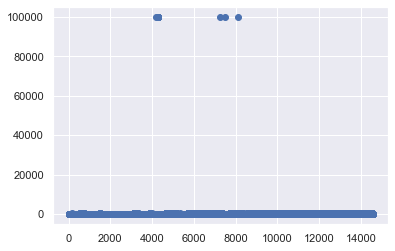

In [22]:
vals = all_weather["Average net radiation"].values
x = len(vals)
plt.scatter(range(x),vals)

In [23]:
outliers = all_weather.index[all_weather["Average net radiation"] >= 20000].tolist()
outliers.sort()
print(outliers)

['2020_02_13_13_30', '2020_02_14_10_15', '2020_02_14_10_30', '2020_02_14_10_45', '2020_02_14_11_00', '2020_02_14_11_15', '2020_02_14_11_30', '2020_02_14_11_45', '2020_02_14_12_00', '2020_03_16_12_45', '2020_03_19_06_15', '2020_03_25_08_30']


In [24]:
# Fix outliers
all_weather.at['2020_02_13_13_30', 'Average net radiation'] = all_weather.loc['2020_02_13_13_15']['Average net radiation']

all_weather.at['2020_02_14_10_15', 'Average net radiation'] = all_weather.loc['2020_02_14_10_00']['Average net radiation']

all_weather.at['2020_02_14_10_30', 'Average net radiation'] = all_weather.loc['2020_02_14_10_15']['Average net radiation']

all_weather.at['2020_02_14_10_45', 'Average net radiation'] = all_weather.loc['2020_02_14_10_30']['Average net radiation']

all_weather.at['2020_02_14_11_00', 'Average net radiation'] = all_weather.loc['2020_02_14_10_45']['Average net radiation']

all_weather.at['2020_02_14_11_15', 'Average net radiation'] = all_weather.loc['2020_02_14_11_00']['Average net radiation']

all_weather.at['2020_02_14_11_30', 'Average net radiation'] = all_weather.loc['2020_02_14_11_15']['Average net radiation']

all_weather.at['2020_02_14_11_45', 'Average net radiation'] = all_weather.loc['2020_02_14_11_30']['Average net radiation']

all_weather.at['2020_02_14_12_00', 'Average net radiation'] = all_weather.loc['2020_02_14_11_45']['Average net radiation']

all_weather.at['2020_03_16_12_45', 'Average net radiation'] = all_weather.loc['2020_03_16_12_30']['Average net radiation']

all_weather.at['2020_03_19_06_15', 'Average net radiation'] = all_weather.loc['2020_03_19_06_00']['Average net radiation']

all_weather.at['2020_03_25_08_30', 'Average net radiation'] = all_weather.loc['2020_03_25_08_15']['Average net radiation']


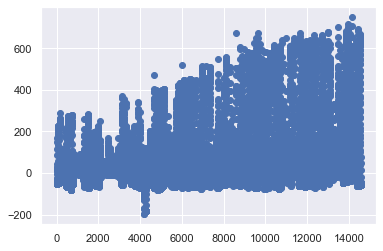

In [25]:
vals = all_weather["Average net radiation"].values
x = len(vals)
plt.scatter(range(x),vals)

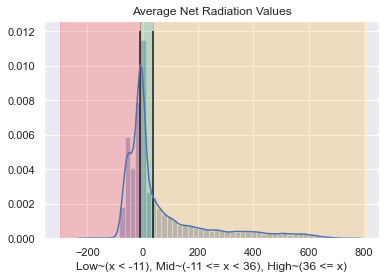

In [26]:
sns.distplot(vals)
plt.title("Average Net Radiation Values")
plt.vlines(-11,ymin=0, ymax=.012)
plt.axvspan(-300, -11, color='red', alpha=0.2)

plt.vlines(36,ymin=0, ymax=.012)
plt.axvspan(-11, 36, color='green', alpha=0.2)

plt.axvspan(36, 800, color='orange', alpha=0.2)

plt.xlabel("Low~(x < -11), Mid~(-11 <= x < 36), High~(36 <= x)")
plt.savefig("Average_Net_Radiation_Values_pic.jpg")

In [27]:
all_weather['Average net radiation'].quantile([0.33,0.66,1])

0.33    -11.37292
0.66     36.24790
1.00    751.06000
Name: Average net radiation, dtype: float64

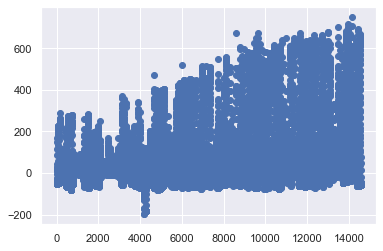

In [28]:
vals = all_weather["Average net radiation"].values
x = len(vals)
plt.scatter(range(x),vals)

In [29]:
solar_values = all_weather["Average net radiation"].values
new_solar_values = []
for i,value in enumerate(solar_values):
    if value < -.11:
        new_solar_values.append(0)
    elif value < 36:
        new_solar_values.append(1)
    else: 
        new_solar_values.append(2)
all_weather["target"] = new_solar_values
all_weather.head()

,Average 60 m temperature,Average 60 m wind speed,Vector-averaged 60 m wind speed,Vector-averaged 60 m wind direction,Standard deviation of 60 m wind direction,Total precipitaion for the period,Estimated heat flux,Estimated friction velocity,Average 10 m temperature,Average 10 m wind speed,Vector-averaged 10 m wind speed,Vector-averaged 10 m wind direction,Standard deviation of 10 m wind direction,Average global irrradiation,Average net radiation,Estimated surface roughness length,Average 10 m vapor pressure,Average 10 m dew point temperature,time_stamp,target
time_stamp,,,,,,,,,,,,,,,,,,,,
2020_01_01_00_15,-3.4994,584.35,578.00,263.98,8.4474,0.0,0.0,34.89,-3.3795,417.91,409.71,264.28,11.341,0.0,-52.595,7.61,0.418,-5.1122,2020_01_01_00_15,0
2020_01_01_00_30,-3.5981,622.76,616.97,263.45,7.8146,0.0,0.0,38.53,-3.4822,442.78,434.80,261.12,10.872,0.0,-52.977,9.21,0.414,-5.2493,2020_01_01_00_30,0
2020_01_01_00_45,-3.7045,642.28,636.82,263.51,7.4678,0.0,0.0,44.15,-3.5998,440.43,432.51,264.08,10.863,0.0,-53.749,17.02,0.414,-5.2413,2020_01_01_00_45,0
2020_01_01_01_00,-3.8625,596.84,591.08,262.92,7.9610,0.0,0.0,39.93,-3.7582,411.30,403.36,259.55,11.250,0.0,-54.059,14.98,0.411,-5.3480,2020_01_01_01_00,0
2020_01_01_01_15,-3.9970,559.11,554.50,262.78,7.3519,0.0,0.0,30.41,-3.9303,407.39,399.90,264.20,10.980,0.0,-53.716,4.33,0.407,-5.4834,2020_01_01_01_15,0


In [30]:
p_targets = all_weather["target"].values
p_targets = p_targets[1:]
all_weather = all_weather.iloc[:-1,:]
all_weather["p_target"] = p_targets

all_weather.head()

,Average 60 m temperature,Average 60 m wind speed,Vector-averaged 60 m wind speed,Vector-averaged 60 m wind direction,Standard deviation of 60 m wind direction,Total precipitaion for the period,Estimated heat flux,Estimated friction velocity,Average 10 m temperature,Average 10 m wind speed,...,Vector-averaged 10 m wind direction,Standard deviation of 10 m wind direction,Average global irrradiation,Average net radiation,Estimated surface roughness length,Average 10 m vapor pressure,Average 10 m dew point temperature,time_stamp,target,p_target
time_stamp,,,,,,,,,,,,,,,,,,,,,
2020_01_01_00_15,-3.4994,584.35,578.00,263.98,8.4474,0.0,0.0,34.89,-3.3795,417.91,...,264.28,11.341,0.0,-52.595,7.61,0.418,-5.1122,2020_01_01_00_15,0,0
2020_01_01_00_30,-3.5981,622.76,616.97,263.45,7.8146,0.0,0.0,38.53,-3.4822,442.78,...,261.12,10.872,0.0,-52.977,9.21,0.414,-5.2493,2020_01_01_00_30,0,0
2020_01_01_00_45,-3.7045,642.28,636.82,263.51,7.4678,0.0,0.0,44.15,-3.5998,440.43,...,264.08,10.863,0.0,-53.749,17.02,0.414,-5.2413,2020_01_01_00_45,0,0
2020_01_01_01_00,-3.8625,596.84,591.08,262.92,7.9610,0.0,0.0,39.93,-3.7582,411.30,...,259.55,11.250,0.0,-54.059,14.98,0.411,-5.3480,2020_01_01_01_00,0,0
2020_01_01_01_15,-3.9970,559.11,554.50,262.78,7.3519,0.0,0.0,30.41,-3.9303,407.39,...,264.20,10.980,0.0,-53.716,4.33,0.407,-5.4834,2020_01_01_01_15,0,0


In [31]:
all_weather.to_csv(working_dir+"/15_min_weather_prep.csv")